In [1]:
import os
import requests
import pandas as pd
import json
from api_keys import census_api_key
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#define years
years = [2019, 2020, 2021, 2022, 2023]
variables = ["B19013_001E", #median household income
              "B25077_001E", #median home value
              "B25064_001E" #median gross rent
              ]
#create list to hold all the data returned
all_data = []

for year in years:
    #Set the base URL
    url = f"http://api.census.gov/data/{year}/acs/acs5" 
    #Set the Params
    params = {
    "get" : f"NAME,{','.join(variables)}",   #requests the county name and variables
    "for" : "county:005,051,067",   #specific counties Clackamas, Multnomah, Washington
    "in" : "state:41",         #Oregon
    "key" : census_api_key
}


# Make the API request
    response = requests.get(url, params=params)
    census_data = response.json()
    for row in census_data[1:]:
        row_with_year = row + [year]
        all_data.append(row_with_year)
    # print(json.dumps(all_data, indent=4))

column_header = census_data[0] + ["Year"]
rows = all_data[1]
census_data_df = pd.DataFrame(all_data, columns=column_header)


In [3]:
#Rename columns
census_data_df = census_data_df.rename(columns={'NAME': 'County', 'B19013_001E': 'Median Household Income',  'B25077_001E': 'Median Home Value',
              'B25064_001E': 'Median Gross Rent', 'state': 'State Code', 'county': 'County Code'})
cleaned_median_income_df = census_data_df.drop(columns=["State Code", "County Code"])

# Convert columns to integers
converted = cleaned_median_income_df.astype({
    'Median Household Income': 'int',
    'Median Home Value': 'int',
    'Median Gross Rent': 'int'
})
df = converted

# Affordability Graph: Price to Income Ratio

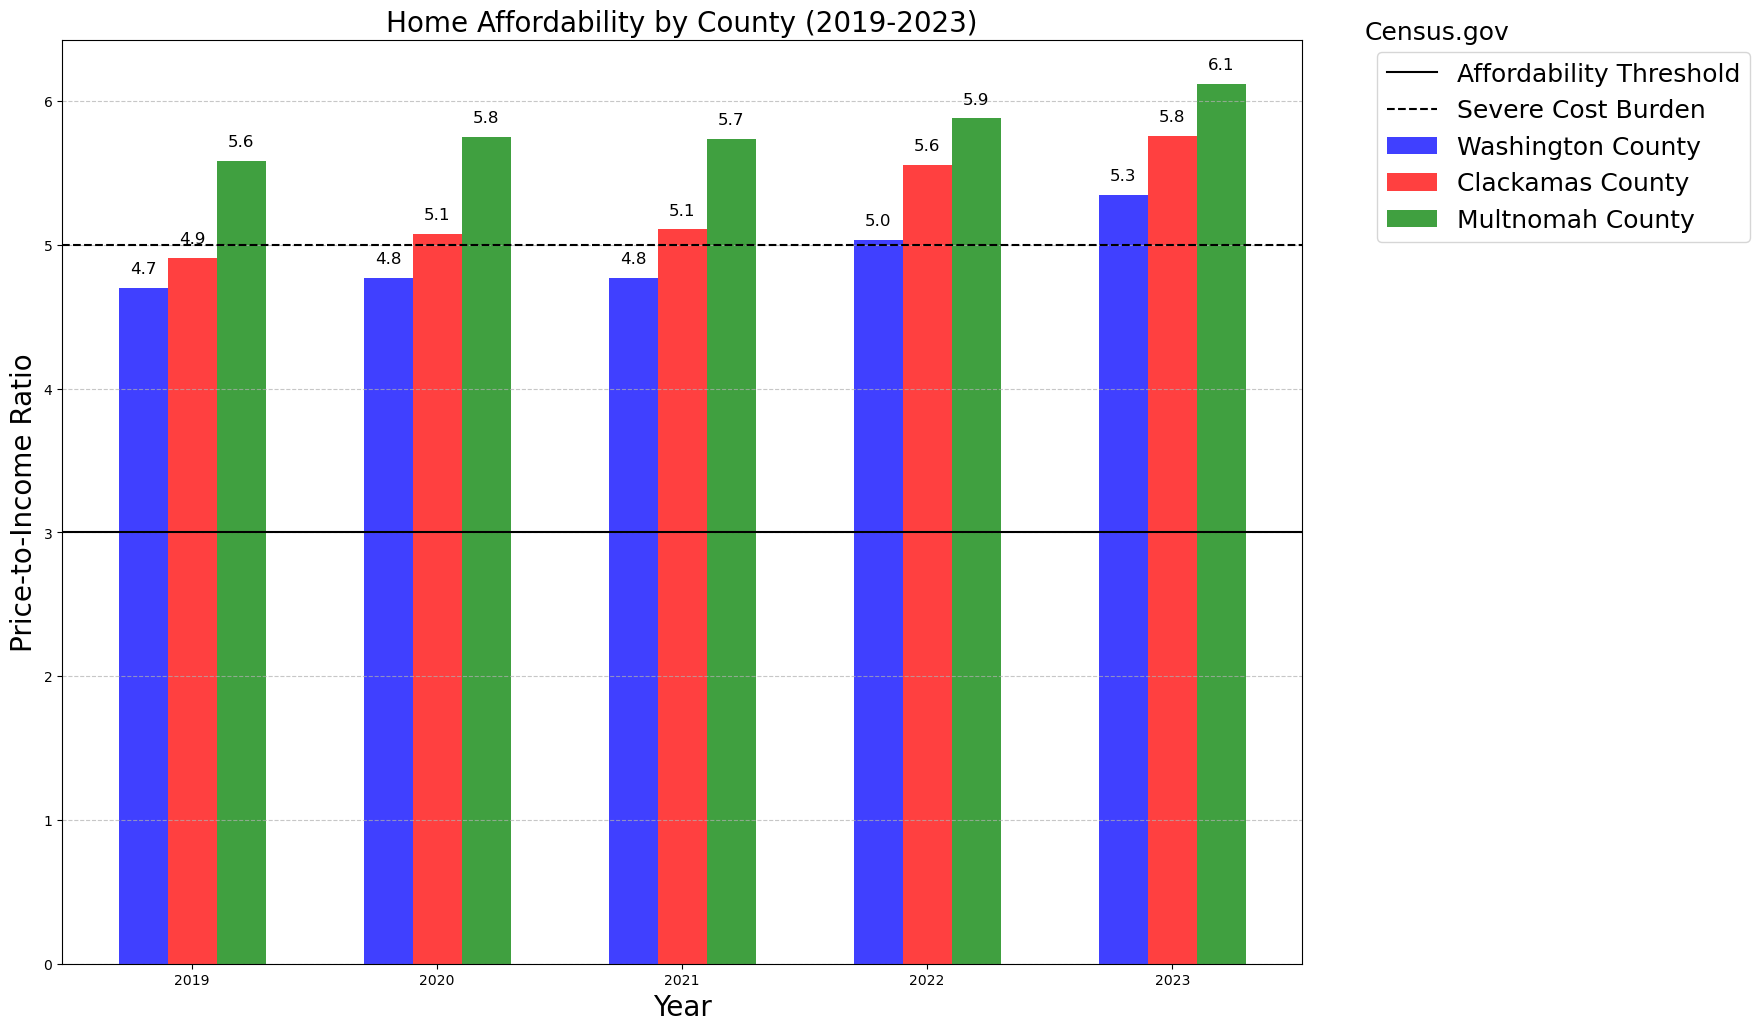

In [4]:
#Calculate PIR and RIR and add column to df
df["Price-to-Income Ratio"] = df['Median Home Value']/ df['Median Household Income']
df["Rent-to-Income Ratio"] = ((df['Median Gross Rent']*12) / df['Median Household Income']) * 100

washington_df = df[df['County']=='Washington County, Oregon']
clackamas_df = df[df['County']=='Clackamas County, Oregon']
multnomah_df = df[df['County']=='Multnomah County, Oregon']

plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Price-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Price-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Price-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

# Add value labels above bars
for i, year in enumerate(washington_df['Year']):
    plt.text(year - 0.2, washington_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{washington_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

for i, year in enumerate(clackamas_df['Year']):
    plt.text(year, clackamas_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{clackamas_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

for i, year in enumerate(multnomah_df['Year']):
    plt.text(year + 0.2, multnomah_df.iloc[i]['Price-to-Income Ratio'] + 0.1, 
             f"{multnomah_df.iloc[i]['Price-to-Income Ratio']:.1f}", ha='center', fontsize=12)

plt.xlabel("Year", fontsize = 20)
plt.ylabel("Price-to-Income Ratio", fontsize = 20)
plt.title("Home Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=3, color="black", linestyle="solid", label="Affordability Threshold")
plt.axhline(y=5, color="black", linestyle="dashed", label="Severe Cost Burden")

plt.legend(loc='best', bbox_to_anchor=(1.05,1), fontsize=18)
plt.text(1.05,1,"Census.gov",transform=plt.gca().transAxes, fontsize=18)
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()


# Affordability Graph: Rent to Income Ratio

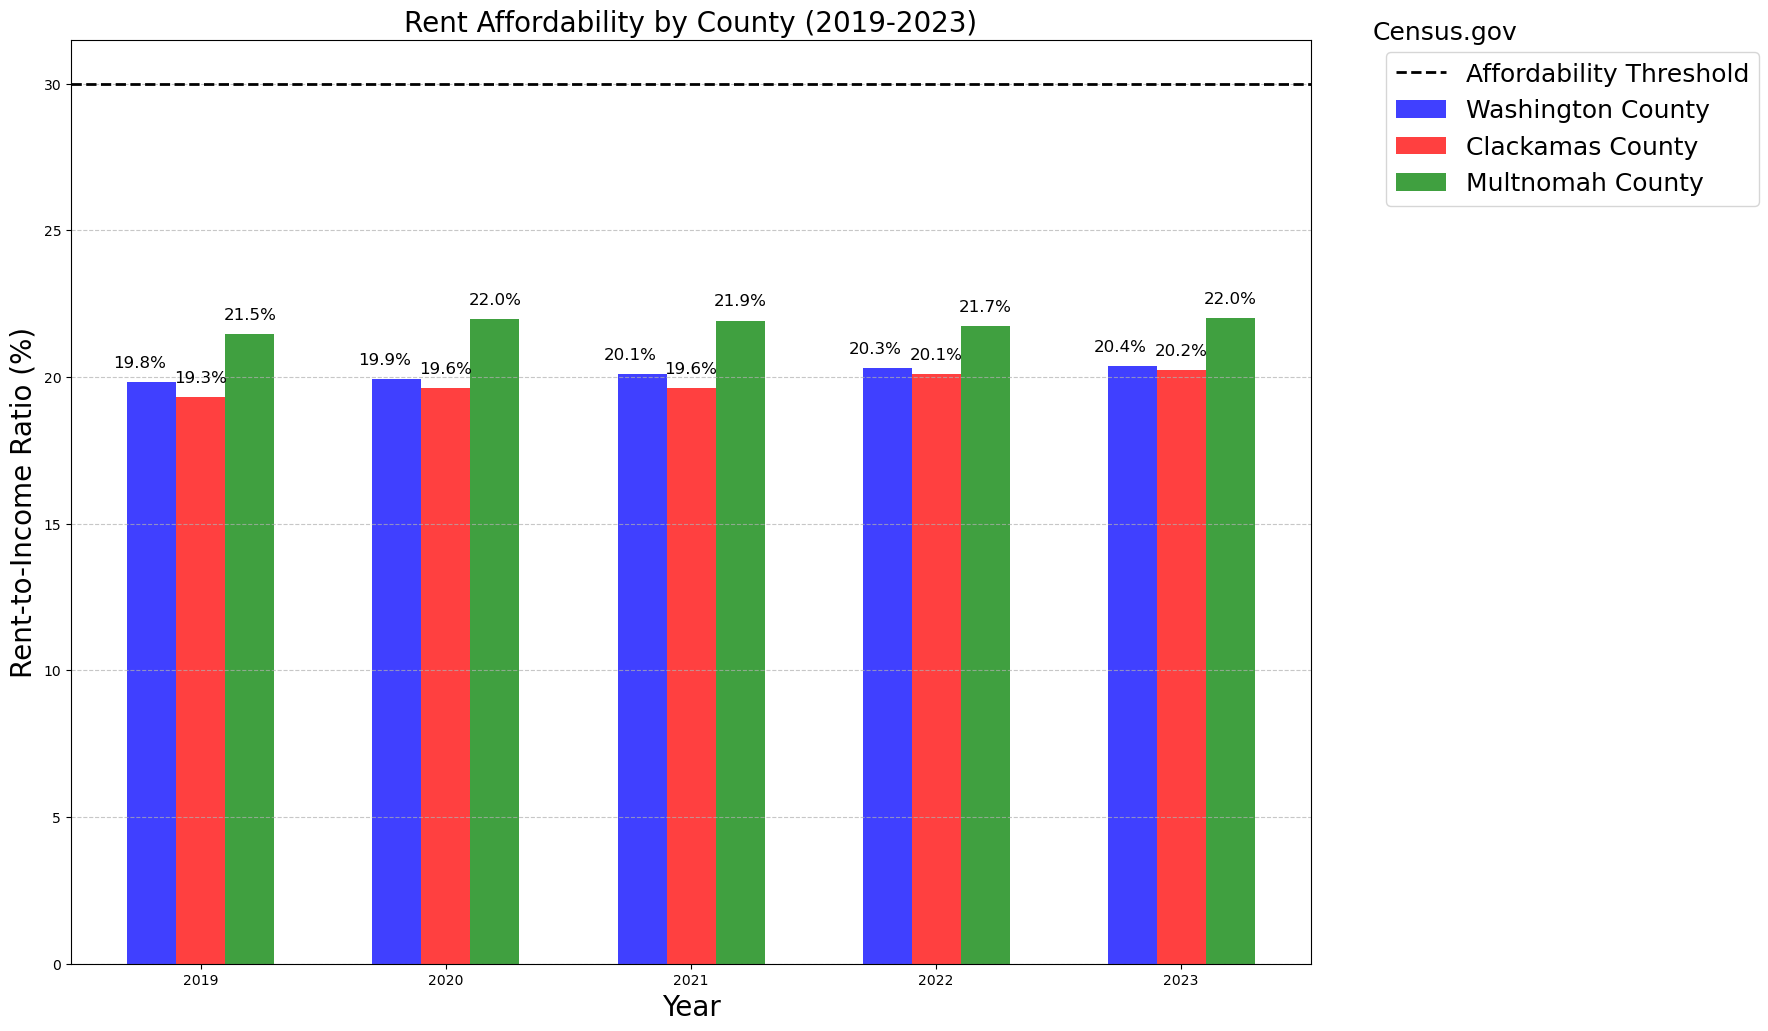

In [5]:
plt.figure(figsize=(16, 12))
plt.bar(washington_df['Year'] - 0.2, washington_df['Rent-to-Income Ratio'], width=0.2, color='blue', alpha=.75, label='Washington County')
plt.bar(clackamas_df['Year'], clackamas_df['Rent-to-Income Ratio'], width=0.2, color='red', alpha=.75, label='Clackamas County')
plt.bar(multnomah_df['Year'] + 0.2, multnomah_df['Rent-to-Income Ratio'], width=0.2, color='green', alpha=.75, label='Multnomah County')

plt.xlabel("Year", fontsize = 20)
plt.ylabel("Rent-to-Income Ratio (%)", fontsize = 20)
plt.title("Rent Affordability by County (2019-2023)", fontsize = 20)
plt.axhline(y=30, color="black", linestyle="dashed", linewidth=2, label="Affordability Threshold")

# Add value labels above bars
for i, year in enumerate(washington_df['Year']):
    plt.text(year - 0.25, washington_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{washington_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)

for i, year in enumerate(clackamas_df['Year']):
    plt.text(year, clackamas_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{clackamas_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)

for i, year in enumerate(multnomah_df['Year']):
    plt.text(year + 0.2, multnomah_df.iloc[i]['Rent-to-Income Ratio'] + 0.5, 
             f"{multnomah_df.iloc[i]['Rent-to-Income Ratio']:.1f}%", ha='center', fontsize=12)
    
plt.legend(loc='best', bbox_to_anchor=(1.05,1), fontsize=18)
plt.text(1.05,1,"Census.gov",transform=plt.gca().transAxes, fontsize=18)
plt.grid(axis="y",linestyle="--", alpha=0.7)

plt.show()